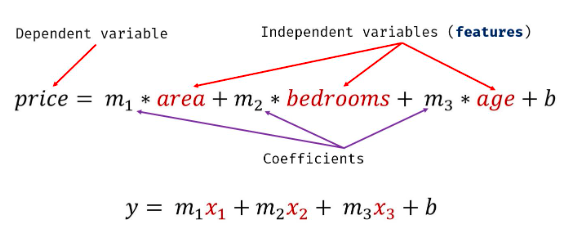

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [6]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [7]:
print('coef:',reg.coef_)
print('intercept:',reg.intercept_)

coef: [  112.06244194 23388.88007794 -3231.71790863]
intercept: 221323.00186540408


In [11]:
# Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old
reg.predict([[3000, 3, 40]])

C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [12]:
# Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old
reg.predict([[2500, 4, 5]])

C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

## Exercise

In [20]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n

In [21]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [22]:
df.experience= df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [25]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [26]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [27]:
reg.predict([[2,9,6]])

C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])